In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# Initialize the weights and bias
w = np.zeros(X.shape[1])
b = 0.0

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# Logistic function

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
loss_history = []

# Gradient Descent

In [5]:
for epoch in range(epochs):
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)

    # Compute the gradients
    dw = (1 / len(X)) * np.dot(X.T, (y_pred - y))
    db = (1 / len(X)) * np.sum(y_pred - y)

    # Update weights and bias
    w -= learning_rate * dw
    b -= learning_rate * db
    print(f"Interation {epoch} wieght {w} : bias {b}") 

    # Calculate the current loss
    loss = (-1 / len(X)) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    loss_history.append(loss)

print("************* Final weights & bias *************")
print("Final weights:", w)
print("Final bias:", b)
print("************************************************")

Interation 0 wieght [0.00306674 0.00263385] : bias 0.0002
Interation 1 wieght [0.00612564 0.00526089] : bias 0.0003985672082460842
Interation 2 wieght [0.00917671 0.00788115] : bias 0.0005957076791012917
Interation 3 wieght [0.01221999 0.01049463] : bias 0.000791427505451168
Interation 4 wieght [0.01525548 0.01310136] : bias 0.000985732817495155
Interation 5 wieght [0.01828321 0.01570135] : bias 0.0011786297815435866
Interation 6 wieght [0.02130321 0.01829463] : bias 0.001370124598820695
Interation 7 wieght [0.02431549 0.02088121] : bias 0.0015602235042740165
Interation 8 wieght [0.02732007 0.02346111] : bias 0.0017489327653905833
Interation 9 wieght [0.03031697 0.02603435] : bias 0.0019362586810202649
Interation 10 wieght [0.03330622 0.02860095] : bias 0.002122207580206623
Interation 11 wieght [0.03628783 0.03116093] : bias 0.002306785821025618
Interation 12 wieght [0.03926184 0.0337143 ] : bias 0.002489999789432511
Interation 13 wieght [0.04222825 0.0362611 ] : bias 0.002671855898117

In [6]:
# Create a grid of points for the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b)
Z = Z.reshape(xx.shape)

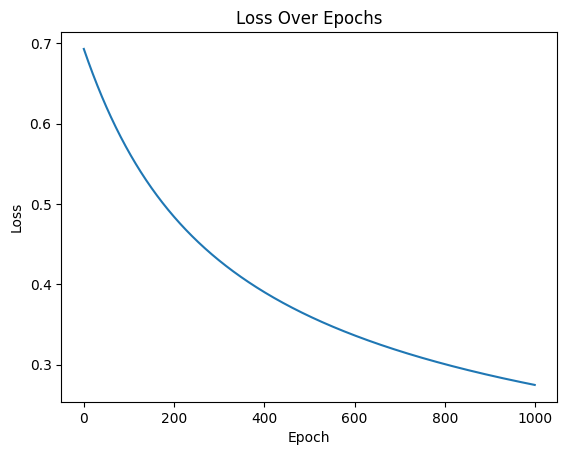

In [7]:
plt.plot(range(epochs), loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.show()

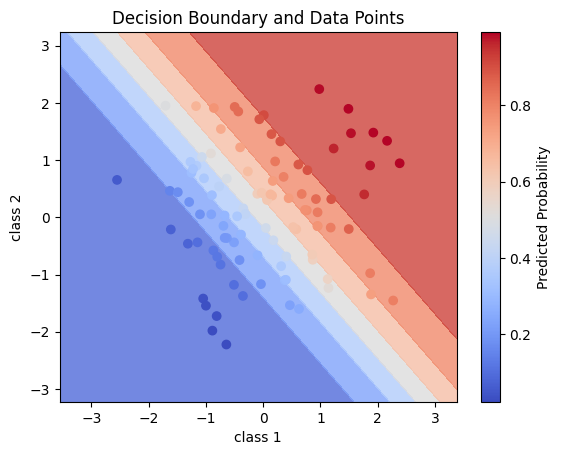

In [8]:
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm')
plt.xlabel('class 1')
plt.ylabel('class 2')
plt.title('Decision Boundary and Data Points')
plt.colorbar(label='Predicted Probability')
plt.show()